In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)

In [ ]:
# Load the train, test and store csv as dataframes
train_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/test.csv')
store_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/store.csv')

<ipython-input-3-b00ccb8bba85>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/ML Assignment/train.csv')


In [ ]:
print('Train Dataframe Information')
print(train_df.info())
print('Test Dataframe Information')
print(test_df.info())
print('Store Dataframe Information')
print(store_df.info())

Train Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
Test Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64 

In [ ]:
sales = train_df['Sales']
pearson_skewness = 3 * (sales.mean() - sales.median()) / sales.std()

print(f"Pearson Skewness of Sales: {pearson_skewness:.4f}")

Pearson Skewness of Sales: 0.0232


In [ ]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
test_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
print(train_df.shape)
print(test_df.shape)
print(store_df.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [ ]:
# Check sum of null values in each colomns
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(store_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [ ]:
print('Unique Values in training Dataframe')
unique_counts = train_df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)
print('Unique Values in testing Dataframe')
unique_counts = test_df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)
print('Unique Values in store Dataframe')
unique_counts = store_df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)

Unique Values in training Dataframe
          Column  Unique Values
0          Store           1115
1      DayOfWeek              7
2           Date            942
3          Sales          21734
4      Customers           4086
5           Open              2
6          Promo              2
7   StateHoliday              5
8  SchoolHoliday              2
Unique Values in testing Dataframe
          Column  Unique Values
0             Id          41088
1          Store            856
2      DayOfWeek              7
3           Date             48
4           Open              2
5          Promo              2
6   StateHoliday              2
7  SchoolHoliday              2
Unique Values in store Dataframe
                      Column  Unique Values
0                      Store           1115
1                  StoreType              4
2                 Assortment              3
3        CompetitionDistance            654
4  CompetitionOpenSinceMonth             12
5   CompetitionOpenSince

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Data Preparation

In [ ]:
# Checking for mixed types since a warning came when loading to dataframe in train dataset
print(train_df['StateHoliday'].value_counts())

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [ ]:
# Checking for mixed types since a warning came when loading to dataframe in train dataset
print(test_df['StateHoliday'].value_counts())

StateHoliday
0    40908
a      180
Name: count, dtype: int64


#### Two '0' are shown because its mixed(string and integer '0'), must convert into string 0s to ensure object dtype is respected

In [ ]:
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

In [ ]:
# Verify the changes
print(train_df['StateHoliday'].value_counts())

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [ ]:
# Ensure Date column is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [ ]:
# Check for null entries in Open colomn
null_count = test_df['Open'].isnull().sum()
print(f"Null values in 'Open': {null_count}")

Null values in 'Open': 11


In [ ]:
# Replace 'null' with '0'
test_df['Open'] = test_df['Open'].fillna(0).astype(int)
print(f"Null values in 'Open': {test_df['Open'].isnull().sum()}")

Null values in 'Open': 0


#### There consists multiple colomns with null entries(MUST be treated)

In [ ]:
# Fill missing CompetitionDistance with the maximum (assumes no nearby competition)
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].max()).astype(float)
# Fill missing date-related features with 0 (likely means no competition/promo data)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0).astype(float)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0).astype(float)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0).astype(float)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0).astype(float)
# Fill missing PromoInterval (object/string type) with a placeholder string
store_df['PromoInterval'] = store_df['PromoInterval'].fillna('None').astype(object)

In [ ]:
# Verify changes
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5594.466368,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,8479.266802,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6905.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
# Merge store details with train set
train_merged = pd.merge(train_df, store_df, on='Store', how='left')
# Merge store details with test set
test_merged = pd.merge(test_df, store_df, on='Store', how='left')

#### Pearson Correlation Matrix for numeric colomns(to find linear relationships)

In [ ]:
# Select numeric columns only
numeric_cols = train_merged.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numeric_cols.corr(method='pearson')

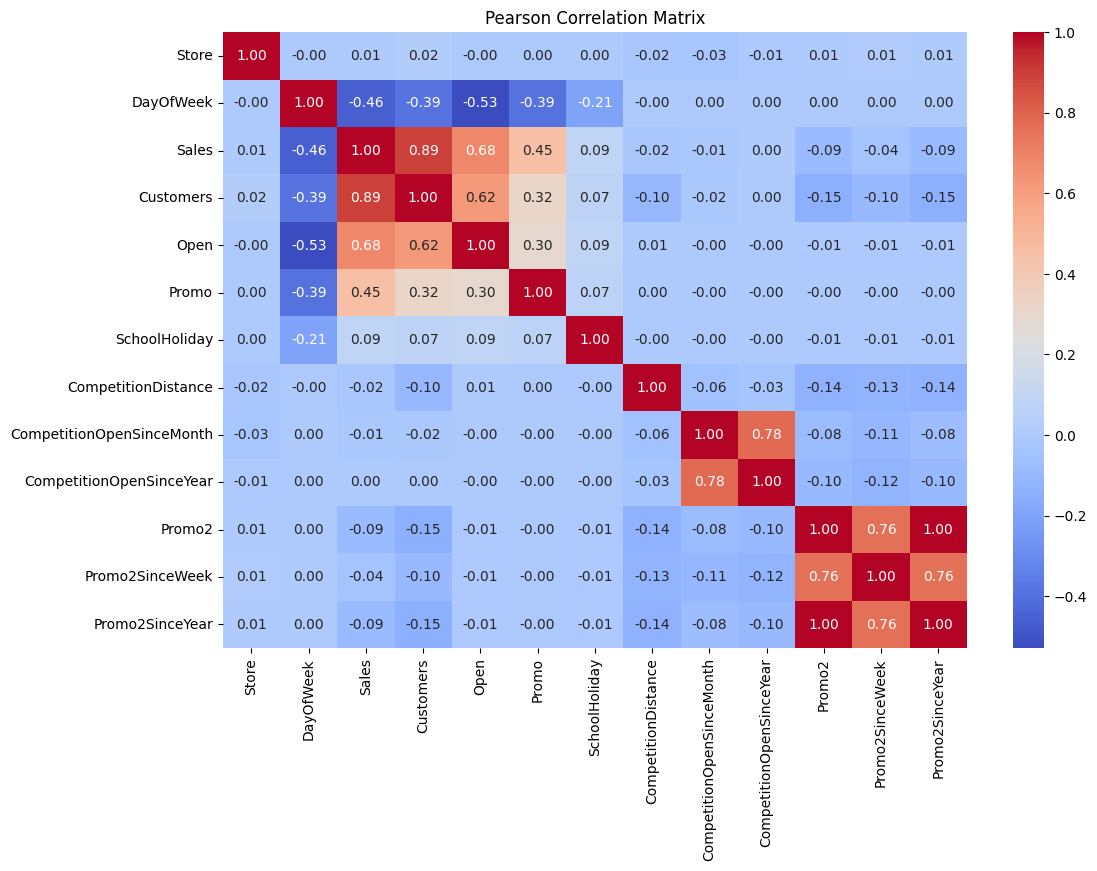

In [ ]:
# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

#### Group by Categorical features

In [ ]:
# Average sales by Promo (0 or 1)
promo_sales = train_merged.groupby('Promo')['Sales'].mean()
print("Average Sales by Promo:\n", promo_sales)
# Average sales by whether the store is open
open_sales = train_merged.groupby('Open')['Sales'].mean()
print("\nAverage Sales by Open:\n", open_sales)
# Average sales by day of the week
dayofweek_sales = train_merged.groupby('DayOfWeek')['Sales'].mean()
print("\nAverage Sales by Day of the Week:\n", dayofweek_sales)
# Average sales by SchoolHoliday
school_sales = train_merged.groupby('SchoolHoliday')['Sales'].mean()
print("\nAverage Sales by School Holiday:\n", school_sales)
# Average sales by StateHoliday
state_sales = train_merged.groupby('StateHoliday')['Sales'].mean()
print("\nAverage Sales by State Holiday:\n", state_sales)
# Average sales by StoreType
storetype_sales = train_merged.groupby('StoreType')['Sales'].mean()
print("\nAverage Sales by Store Type:\n", storetype_sales)
# Average sales by Assortment
storetype_sales = train_merged.groupby('Assortment')['Sales'].mean()
print("\nAverage Sales by Assortment:\n", storetype_sales)

Average Sales by Promo:
 Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

Average Sales by Open:
 Open
0       0.000000
1    6955.514291
Name: Sales, dtype: float64

Average Sales by Day of the Week:
 DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

Average Sales by School Holiday:
 SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64

Average Sales by State Holiday:
 StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

Average Sales by Store Type:
 StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

Average Sales by Assortment:
 Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


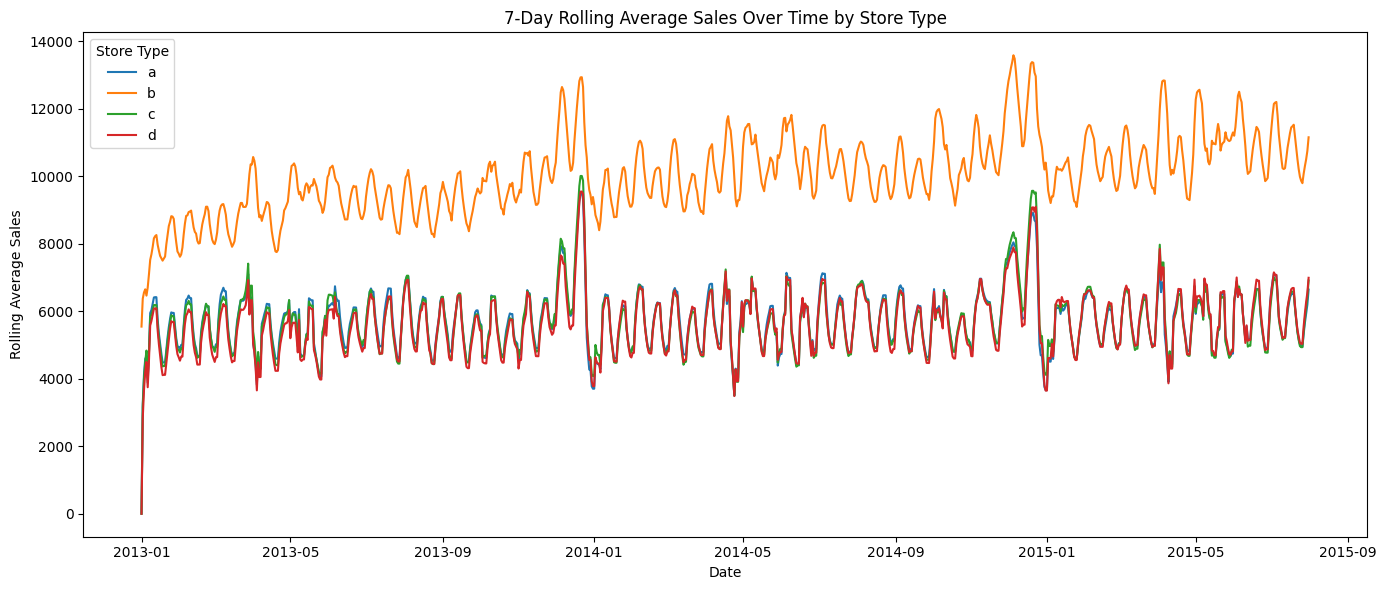

In [ ]:
# Group by Date and StoreType and calculate average Sales
sales_over_time = train_merged.groupby(['Date', 'StoreType'])['Sales'].mean().reset_index()

# Compute 7-day rolling average for each StoreType
sales_over_time['SalesRolling'] = sales_over_time.groupby('StoreType')['Sales'].transform(lambda x: x.rolling(7, min_periods=1).mean())

# Plot the smoothed sales
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_over_time, x='Date', y='SalesRolling', hue='StoreType')
plt.title("7-Day Rolling Average Sales Over Time by Store Type")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sales")
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

In [ ]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  int64         
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        41088 non-null  float64       
 11  CompetitionOpenSinceMonth  41088 non-null  float64       
 12  Comp

In [ ]:
print('Unique Values in merged training Dataframe')
unique_counts = train_merged.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)
print('Unique Values in merged testing Dataframe')
unique_counts = test_merged.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Values']
print(unique_counts)

Unique Values in merged training Dataframe
                       Column  Unique Values
0                       Store           1115
1                   DayOfWeek              7
2                        Date            942
3                       Sales          21734
4                   Customers           4086
5                        Open              2
6                       Promo              2
7                StateHoliday              4
8               SchoolHoliday              2
9                   StoreType              4
10                 Assortment              3
11        CompetitionDistance            654
12  CompetitionOpenSinceMonth             13
13   CompetitionOpenSinceYear             24
14                     Promo2              2
15            Promo2SinceWeek             25
16            Promo2SinceYear              8
17              PromoInterval              4
Unique Values in merged testing Dataframe
                       Column  Unique Values
0              

In [ ]:
print(train_merged['PromoInterval'].value_counts())

PromoInterval
None                508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64


### Feature engineering and Data Preparation

In [ ]:
# Handle categorical variables
# StateHoliday encoding
for col in ['0', 'a', 'b', 'c']:
    train_merged[f'StateHoliday_{col}'] = (train_merged['StateHoliday'] == col).astype(int)
    test_merged[f'StateHoliday_{col}'] = (test_merged['StateHoliday'] == col).astype(int)

# StoreType encoding
for col in ['a', 'b', 'c', 'd']:
    train_merged[f'StoreType_{col}'] = (train_merged['StoreType'] == col).astype(int)
    test_merged[f'StoreType_{col}'] = (test_merged['StoreType'] == col).astype(int)

# Assortment encoding
for col in ['a', 'b', 'c']:
    train_merged[f'Assortment_{col}'] = (train_merged['Assortment'] == col).astype(int)
    test_merged[f'Assortment_{col}'] = (test_merged['Assortment'] == col).astype(int)

# PromoInterval encoding
promo_intervals = ['None', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']
for interval in promo_intervals:
    train_merged[f'PromoInterval_{interval}'] = (train_merged['PromoInterval'] == interval).astype(int)
    test_merged[f'PromoInterval_{interval}'] = (test_merged['PromoInterval'] == interval).astype(int)

# Date-based features
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Year'] = train_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Year'] = test_merged['Date'].dt.year

# Competition features
train_merged['CompetitionOpen'] = 12 * (train_merged['Year'] - train_merged['CompetitionOpenSinceYear']) + \
                                (train_merged['Month'] - train_merged['CompetitionOpenSinceMonth'])
test_merged['CompetitionOpen'] = 12 * (test_merged['Year'] - test_merged['CompetitionOpenSinceYear']) + \
                               (test_merged['Month'] - test_merged['CompetitionOpenSinceMonth'])

# Fix negative values
train_merged['CompetitionOpen'] = train_merged['CompetitionOpen'].apply(lambda x: 0 if x < 0 else x)
test_merged['CompetitionOpen'] = test_merged['CompetitionOpen'].apply(lambda x: 0 if x < 0 else x)

# Simple Promo2Active feature - checks if month is in PromoInterval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

def is_promo2_active(row):
    if row['Promo2'] == 0:
        return 0
    if row['PromoInterval'] == 'None':
        return 0

    month_abbr = month_map[row['Month']]
    return 1 if month_abbr in row['PromoInterval'] else 0

train_merged['Promo2Active'] = train_merged.apply(is_promo2_active, axis=1)
test_merged['Promo2Active'] = test_merged.apply(is_promo2_active, axis=1)

# Drop original categorical columns
cols_to_drop = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval',
               'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
               'Promo2SinceWeek', 'Promo2SinceYear']

# Prepare final datasets
X_train = train_merged.drop(cols_to_drop + ['Sales', 'Customers', 'Date'], axis=1)
y_sales = train_merged['Sales']
y_customers = train_merged['Customers']

X_test = test_merged.drop(cols_to_drop + ['Id', 'Date'], axis=1)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (1017209, 26)
Testing features shape: (41088, 26)


## Create Model

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Function to evaluate Prophet model
def evaluate_prophet(model, df_val):
    # Make predictions for validation period
    future = model.make_future_dataframe(periods=0)
    future = pd.concat([future, df_val[['ds']]])
    future = future.drop_duplicates().reset_index(drop=True)

    forecast = model.predict(future)
    # Merge validation data with predictions
    results = pd.merge(df_val, forecast[['ds', 'yhat']], on='ds')

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
    mae = mean_absolute_error(results['y'], results['yhat'])
    r2 = r2_score(results['y'], results['yhat'])

    return rmse, mae, r2, forecast

In [ ]:
# Prepare data for Prophet (requires 'ds' for dates and 'y' for target variable)
store_data = train_merged[['Date', 'Store', 'Sales']]
store_data.columns = ['ds', 'store', 'y']

# Split data for validation (by date to maintain time series integrity)
split_date = pd.to_datetime(store_data['ds'].max()) - pd.Timedelta(days=30)
train_prophet = store_data[store_data['ds'] <= split_date]
val_prophet = store_data[store_data['ds'] > split_date]

# Group by date for simplicity
train_agg = train_prophet.groupby('ds')['y'].mean().reset_index()
val_agg = val_prophet.groupby('ds')['y'].mean().reset_index()

In [ ]:
# Train the model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.fit(train_agg)

# Evaluate
rmse, mae, r2, forecast = evaluate_prophet(model, val_agg)
print(f"Validation Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/jbd6c1pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/un_jlmqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77487', 'data', 'file=/tmp/tmphqsn3002/jbd6c1pv.json', 'init=/tmp/tmphqsn3002/un_jlmqx.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelebfc0w5d/prophet_model-20250409135305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Validation Results:
RMSE: 1057.75
MAE: 908.98
R²: 0.8317


In [ ]:
# Function for hyperparameter optimization
def optimize_prophet_hyperparams(train_df, val_df):
    best_rmse = float('inf')
    best_params = {}

    # Parameter grid (simplified)
    param_grid = {
        'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
        'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
        'seasonality_mode': ['additive', 'multiplicative']
    }

    # Try combinations
    for changepoint_prior in param_grid['changepoint_prior_scale']:
        for seasonality_prior in param_grid['seasonality_prior_scale']:
            for seasonality_mode in param_grid['seasonality_mode']:
                # Create and fit model with current parameters
                model = Prophet(
                    changepoint_prior_scale=changepoint_prior,
                    seasonality_prior_scale=seasonality_prior,
                    seasonality_mode=seasonality_mode,
                    yearly_seasonality=True,
                    weekly_seasonality=True
                )

                model.fit(train_df)
                rmse, _, _, _ = evaluate_prophet(model, val_df)

                # Update best parameters if improved
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        'changepoint_prior_scale': changepoint_prior,
                        'seasonality_prior_scale': seasonality_prior,
                        'seasonality_mode': seasonality_mode
                    }

                print(f"RMSE: {rmse:.2f}, Parameters: {changepoint_prior}, {seasonality_prior}, {seasonality_mode}")

    return best_params, best_rmse

In [ ]:
# Uncomment to run hyperparameter optimization (takes time)
best_params, best_rmse = optimize_prophet_hyperparams(train_agg, val_agg)
print(f"\nBest Parameters: {best_params}")
print(f"Best RMSE: {best_rmse:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/kgc2g3mz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/retyoc77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15591', 'data', 'file=/tmp/tmphqsn3002/kgc2g3mz.json', 'init=/tmp/tmphqsn3002/retyoc77.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modela9njl2qt/prophet_model-20250409135315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphq

RMSE: 1148.91, Parameters: 0.001, 0.01, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/7u615rfk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/vdmfwjvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4321', 'data', 'file=/tmp/tmphqsn3002/7u615rfk.json', 'init=/tmp/tmphqsn3002/vdmfwjvj.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modeli9vh7ns9/prophet_model-20250409135315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 3845.40, Parameters: 0.001, 0.01, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/rfrjf_gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/hzxp_nd6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35872', 'data', 'file=/tmp/tmphqsn3002/rfrjf_gh.json', 'init=/tmp/tmphqsn3002/hzxp_nd6.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modeldo81jys6/prophet_model-20250409135316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1216.12, Parameters: 0.001, 0.1, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/agmk97ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/i7syaptj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88660', 'data', 'file=/tmp/tmphqsn3002/agmk97ns.json', 'init=/tmp/tmphqsn3002/i7syaptj.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelo2jvytt1/prophet_model-20250409135316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1079.29, Parameters: 0.001, 0.1, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/yatufq7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/8kkj8t15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36592', 'data', 'file=/tmp/tmphqsn3002/yatufq7z.json', 'init=/tmp/tmphqsn3002/8kkj8t15.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelk7um1lgt/prophet_model-20250409135316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1079.82, Parameters: 0.001, 1.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/17uppgtw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/a858znw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74933', 'data', 'file=/tmp/tmphqsn3002/17uppgtw.json', 'init=/tmp/tmphqsn3002/a858znw4.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelge8ta1y7/prophet_model-20250409135316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1696.58, Parameters: 0.001, 1.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/_lvgbdsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/9jrdtzqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20217', 'data', 'file=/tmp/tmphqsn3002/_lvgbdsz.json', 'init=/tmp/tmphqsn3002/9jrdtzqg.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modeljb4pd8em/prophet_model-20250409135317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1058.78, Parameters: 0.001, 10.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/fzbd0l65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/ov95wo_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88592', 'data', 'file=/tmp/tmphqsn3002/fzbd0l65.json', 'init=/tmp/tmphqsn3002/ov95wo_7.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modely5vt52qw/prophet_model-20250409135317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1177.72, Parameters: 0.001, 10.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/g5oxqgra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/018s2652.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47765', 'data', 'file=/tmp/tmphqsn3002/g5oxqgra.json', 'init=/tmp/tmphqsn3002/018s2652.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelje348r4o/prophet_model-20250409135317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1245.02, Parameters: 0.01, 0.01, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/rih48ne1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/co_s3fe4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76800', 'data', 'file=/tmp/tmphqsn3002/rih48ne1.json', 'init=/tmp/tmphqsn3002/co_s3fe4.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelh520i2z4/prophet_model-20250409135317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 2152.28, Parameters: 0.01, 0.01, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/sjwszke7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/kb2_8yb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11073', 'data', 'file=/tmp/tmphqsn3002/sjwszke7.json', 'init=/tmp/tmphqsn3002/kb2_8yb_.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelqmffv8rb/prophet_model-20250409135318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1061.52, Parameters: 0.01, 0.1, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/lkxqwlgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/wp_s1woo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54132', 'data', 'file=/tmp/tmphqsn3002/lkxqwlgv.json', 'init=/tmp/tmphqsn3002/wp_s1woo.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelb4vmbnus/prophet_model-20250409135318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1071.24, Parameters: 0.01, 0.1, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/9vboertl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/elwyd3mn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26980', 'data', 'file=/tmp/tmphqsn3002/9vboertl.json', 'init=/tmp/tmphqsn3002/elwyd3mn.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modeloou105rs/prophet_model-20250409135318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1064.39, Parameters: 0.01, 1.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/pfqdct9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/q7f3zv6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18252', 'data', 'file=/tmp/tmphqsn3002/pfqdct9a.json', 'init=/tmp/tmphqsn3002/q7f3zv6d.json', 'output', 'file=/tmp/tmphqsn3002/prophet_model9ju1cedb/prophet_model-20250409135318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1065.28, Parameters: 0.01, 1.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/6w4m8hji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/rnjz054j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=836', 'data', 'file=/tmp/tmphqsn3002/6w4m8hji.json', 'init=/tmp/tmphqsn3002/rnjz054j.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelpbsa8uir/prophet_model-20250409135319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1063.49, Parameters: 0.01, 10.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/96hck0h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/6t0ipsi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17292', 'data', 'file=/tmp/tmphqsn3002/96hck0h8.json', 'init=/tmp/tmphqsn3002/6t0ipsi4.json', 'output', 'file=/tmp/tmphqsn3002/prophet_model1parfbi5/prophet_model-20250409135319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1068.41, Parameters: 0.01, 10.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/lv_q46qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/714m0foq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29647', 'data', 'file=/tmp/tmphqsn3002/lv_q46qv.json', 'init=/tmp/tmphqsn3002/714m0foq.json', 'output', 'file=/tmp/tmphqsn3002/prophet_models8mtpj3i/prophet_model-20250409135319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1243.42, Parameters: 0.1, 0.01, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/rfwrsb6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/haxv2ekf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8570', 'data', 'file=/tmp/tmphqsn3002/rfwrsb6y.json', 'init=/tmp/tmphqsn3002/haxv2ekf.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modely7m2lme7/prophet_model-20250409135320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 2154.00, Parameters: 0.1, 0.01, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/4tfnmj1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/raperrf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47447', 'data', 'file=/tmp/tmphqsn3002/4tfnmj1c.json', 'init=/tmp/tmphqsn3002/raperrf_.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelo5qr_a1o/prophet_model-20250409135320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1055.85, Parameters: 0.1, 0.1, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/l7iai95o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/87fdk3b7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92667', 'data', 'file=/tmp/tmphqsn3002/l7iai95o.json', 'init=/tmp/tmphqsn3002/87fdk3b7.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelx1aq8hlk/prophet_model-20250409135320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1059.22, Parameters: 0.1, 0.1, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/x7i1p7if.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/jc1j7g7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34960', 'data', 'file=/tmp/tmphqsn3002/x7i1p7if.json', 'init=/tmp/tmphqsn3002/jc1j7g7q.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelt6lfhd1b/prophet_model-20250409135320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1056.24, Parameters: 0.1, 1.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/c9yystik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/bz2mdfsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54353', 'data', 'file=/tmp/tmphqsn3002/c9yystik.json', 'init=/tmp/tmphqsn3002/bz2mdfsh.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modeli7fvphob/prophet_model-20250409135321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1055.79, Parameters: 0.1, 1.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/dlk_0bii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/ud8b2eyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67582', 'data', 'file=/tmp/tmphqsn3002/dlk_0bii.json', 'init=/tmp/tmphqsn3002/ud8b2eyc.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelxh1nawq8/prophet_model-20250409135321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1056.21, Parameters: 0.1, 10.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/x4avf_so.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/72vvpx44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49990', 'data', 'file=/tmp/tmphqsn3002/x4avf_so.json', 'init=/tmp/tmphqsn3002/72vvpx44.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelwn8b3j6e/prophet_model-20250409135321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1055.96, Parameters: 0.1, 10.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/9d3f7lg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/xffsfzhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96941', 'data', 'file=/tmp/tmphqsn3002/9d3f7lg0.json', 'init=/tmp/tmphqsn3002/xffsfzhz.json', 'output', 'file=/tmp/tmphqsn3002/prophet_model7a2bi3_m/prophet_model-20250409135321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1241.41, Parameters: 0.5, 0.01, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/e1ljr90c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/nrq38t13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4267', 'data', 'file=/tmp/tmphqsn3002/e1ljr90c.json', 'init=/tmp/tmphqsn3002/nrq38t13.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelec8a9yas/prophet_model-20250409135322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 2156.17, Parameters: 0.5, 0.01, multiplicative


13:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/hqyxqzrp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/capt_9vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36374', 'data', 'file=/tmp/tmphqsn3002/hqyxqzrp.json', 'init=/tmp/tmphqsn3002/capt_9vz.json', 'output', 'file=/tmp/tmphqsn3002/prophet_model0a5swhfz/prophet_model-20250409135322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1056.96, Parameters: 0.5, 0.1, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/6xyd8nly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/coes2zlf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89010', 'data', 'file=/tmp/tmphqsn3002/6xyd8nly.json', 'init=/tmp/tmphqsn3002/coes2zlf.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelatr5ikjh/prophet_model-20250409135322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1053.86, Parameters: 0.5, 0.1, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/0ytpw_o3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/wm73vgnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49520', 'data', 'file=/tmp/tmphqsn3002/0ytpw_o3.json', 'init=/tmp/tmphqsn3002/wm73vgnu.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelceqniqb_/prophet_model-20250409135323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1056.06, Parameters: 0.5, 1.0, additive


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/uji5vwm6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/kchsztwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95380', 'data', 'file=/tmp/tmphqsn3002/uji5vwm6.json', 'init=/tmp/tmphqsn3002/kchsztwm.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modely57i9sa3/prophet_model-20250409135323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1052.48, Parameters: 0.5, 1.0, multiplicative


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/tg1whze3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/pw_9g7_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38917', 'data', 'file=/tmp/tmphqsn3002/tg1whze3.json', 'init=/tmp/tmphqsn3002/pw_9g7_b.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelk3wkll_v/prophet_model-20250409135323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1056.92, Parameters: 0.5, 10.0, additive
RMSE: 1053.18, Parameters: 0.5, 10.0, multiplicative

Best Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}
Best RMSE: 1052.48


In [ ]:
# Train final model (either with default or best parameters)
final_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    # Uncomment and add best parameters if optimization was run
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    seasonality_mode=best_params['seasonality_mode']
)
final_model.fit(train_agg)

# Prepare test dates
test_dates = pd.DataFrame({'ds': pd.to_datetime(test_merged['Date'].unique())})
forecast_test = final_model.predict(test_dates)

# Join with test data
test_predictions = pd.merge(
    test_merged[['Id', 'Date']],
    forecast_test[['ds', 'yhat']],
    left_on='Date',
    right_on='ds',
    how='left'
)

# Create submission
submission = pd.DataFrame({
    'Id': test_predictions['Id'],
    'Sales': test_predictions['yhat'].clip(0)  # Prevent negative sales
})

submission.to_csv('/content/drive/MyDrive/ML Assignment/prophet_sales_prediction.csv', index=False)
print("\nPredictions saved to 'prophet_sales_prediction.csv'")

DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/mv5po1vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphqsn3002/csp8uvbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80480', 'data', 'file=/tmp/tmphqsn3002/mv5po1vr.json', 'init=/tmp/tmphqsn3002/csp8uvbr.json', 'output', 'file=/tmp/tmphqsn3002/prophet_modelgp1idslp/prophet_model-20250409135648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predictions saved to 'prophet_sales_prediction.csv'
